# WeatherPy
----

In [1]:
# Dependencies and Setup
import json
import requests
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/city_data.csv"

# Range of latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
city_names = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 1
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#         date.append(response["dt"])

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date = datetime.datetime.fromtimestamp(int(response['dt'])).strftime('%m-%d-%Y')
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 2 of Set 1 : tasiilaq
Processing Record 3 of Set 1 : avarua
Processing Record 4 of Set 1 : severo-kurilsk
Processing Record 5 of Set 1 : jamestown
Processing Record 6 of Set 1 : jacobabad
Processing Record 7 of Set 1 : katsuura
City not found. Skipping...
Processing Record 8 of Set 1 : gat
Processing Record 9 of Set 1 : kapaa
Processing Record 10 of Set 1 : rikitea
Processing Record 11 of Set 1 : coronado
Processing Record 12 of Set 1 : elban
Processing Record 13 of Set 1 : bathsheba
City not found. Skipping...
Processing Record 14 of Set 1 : tabou
Processing Record 15 of Set 1 : albany
Processing Record 16 of Set 1 : koceljeva
Processing Record 17 of Set 1 : new norfolk
Processing Record 18 of Set 1 : thompson
Processing Record 19 of Set 1 : mar del plata
Processing Record 20 of Set 1 : byron bay
Processing Record 21 of Set 1 : isiro
Processing Record 22 of Set 1 : hofn
Processing Record 23 of Set 1 : punta aren

Processing Record 35 of Set 4 : parola
Processing Record 36 of Set 4 : aleksandrovskoye
Processing Record 37 of Set 4 : wheatley
Processing Record 38 of Set 4 : talnakh
Processing Record 39 of Set 4 : khani
Processing Record 40 of Set 4 : bengkulu
Processing Record 41 of Set 4 : saurimo
Processing Record 42 of Set 4 : vardo
Processing Record 43 of Set 4 : kushiro
Processing Record 44 of Set 4 : rengo
Processing Record 45 of Set 4 : beatrice
Processing Record 46 of Set 4 : maumere
Processing Record 47 of Set 4 : taoudenni
Processing Record 48 of Set 4 : los llanos de aridane
Processing Record 49 of Set 4 : yima
Processing Record 50 of Set 4 : deputatskiy
Processing Record 0 of Set 5 : saposoa
Processing Record 1 of Set 5 : ust-ilimsk
Processing Record 2 of Set 5 : batagay-alyta
Processing Record 3 of Set 5 : oistins
Processing Record 4 of Set 5 : mollendo
Processing Record 5 of Set 5 : meulaboh
Processing Record 6 of Set 5 : andahuaylas
Processing Record 7 of Set 5 : lagoa
City not foun

Processing Record 21 of Set 8 : bay-khaak
Processing Record 22 of Set 8 : hangu
Processing Record 23 of Set 8 : wadi maliz
Processing Record 24 of Set 8 : mao
Processing Record 25 of Set 8 : kysyl-syr
City not found. Skipping...
Processing Record 26 of Set 8 : lompoc
Processing Record 27 of Set 8 : mogadishu
Processing Record 28 of Set 8 : vagamo
Processing Record 29 of Set 8 : alzey
Processing Record 30 of Set 8 : sobolevo
Processing Record 31 of Set 8 : hambantota
Processing Record 32 of Set 8 : zhaoyang
Processing Record 33 of Set 8 : margate
Processing Record 34 of Set 8 : katherine
Processing Record 35 of Set 8 : marsa matruh
Processing Record 36 of Set 8 : ghanzi
Processing Record 37 of Set 8 : makakilo city
Processing Record 38 of Set 8 : bulancak
Processing Record 39 of Set 8 : natal
Processing Record 40 of Set 8 : lebedinyy
Processing Record 41 of Set 8 : dwarka
Processing Record 42 of Set 8 : waitati
Processing Record 43 of Set 8 : catalina
Processing Record 44 of Set 8 : bal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Put the data into a dataframe
city_data_df = pd.DataFrame({
    "City": city_names,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

# Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,28.40,64,28,3.44,GL,05-16-2021
1,Avarua,-21.2078,-159.7750,77.00,78,75,9.22,CK,05-16-2021
2,Severo-Kuril'sk,50.6789,156.1250,37.02,89,100,18.90,RU,05-16-2021
3,Jamestown,42.0970,-79.2353,53.60,40,90,3.36,US,05-16-2021
4,Jacobabad,28.2810,68.4388,105.24,19,0,11.27,PK,05-16-2021


In [6]:
# How many entries were returned?
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [7]:
# Inspect the data by using the describe function
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,19.437542,21.043624,65.039055,67.629234,55.445633,7.900980
std,33.954328,89.383915,18.588466,24.140396,39.381164,5.142747
min,-54.800000,-175.200000,5.000000,4.000000,0.000000,0.490000
25%,-8.926600,-54.916700,52.000000,51.000000,14.000000,3.890000
50%,22.285500,24.146600,66.510000,74.000000,65.000000,6.910000
75%,48.685000,102.661900,80.010000,87.000000,97.000000,10.800000
max,78.218600,178.416700,108.500000,100.000000,100.000000,29.930000


In [8]:
# Export the city data into a csv file
city_data_df.to_csv("../output_data/city_data.csv", index=False)

In [9]:
# Show Record Count
countforme = len(city_data_df)
countforme

561

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Calculate latest date (max) for plot titles
tstamp = city_data_df.Date.max()
tstamp

'05-16-2021'

#### Latitude vs. Temperature Plot

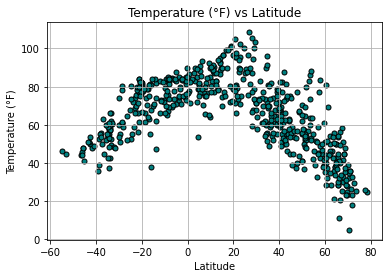

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude")

plt.savefig("../images/tempvlat.png")

# As latitude approaches 0, i.e. the equator, temperature increases

#### Latitude vs. Humidity Plot

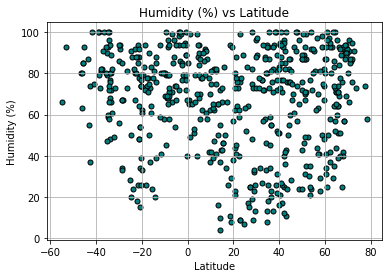

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude")

plt.savefig("../images/humvlat.png")

# There seems to be no relationship between humidity and latitude

#### Latitude vs. Cloudiness Plot

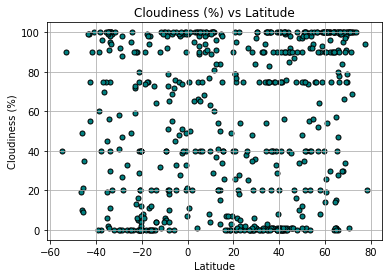

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs Latitude")

plt.savefig("../images/cloudvlat.png")

# There seems to be no relationship between cloudiness and latitude

#### Latitude vs. Wind Speed Plot

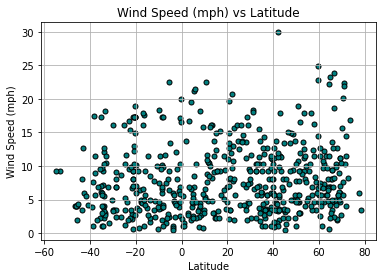

In [14]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs Latitude")

plt.savefig("../images/windvlat.png")

# There seems to be no relationship between wind speed and latitude

## Linear Regression

In [15]:
# Locate cities above or equal to 0 latitude and below 0 latitude
northern_cities = city_data_df[city_data_df.loc[:, "Lat"] >= 0]
southern_cities = city_data_df[city_data_df.loc[:, "Lat"] < 0]

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]
southlat_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

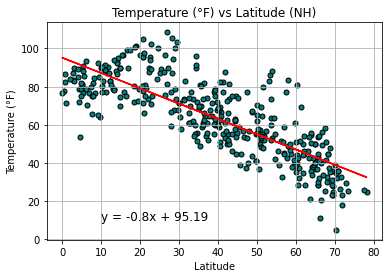

In [17]:
# Plot Temperature (°F) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Max Temp"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(10,10),fontsize=12,color="black")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatnh.png")

In [18]:
print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The high r value indicates a strong positive correlation between latitude and max temperature.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

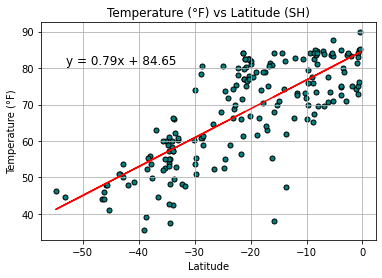

In [19]:
# Plot Temperature (°F) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Max Temp"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-53,81),fontsize=12,color="black")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatsh.png")

In [20]:
print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The high r value indicates a strong positive correlation between latitude and max temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

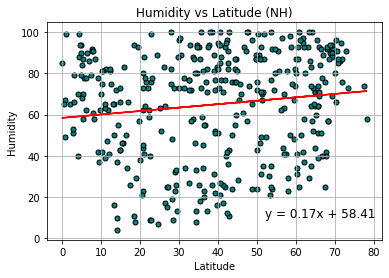

In [21]:
# Plot Humidity vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Humidity"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(52,10),fontsize=12,color="black")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/northernhumvlat.png")

In [22]:
print("The low r values indicate a weak to no relationship between humidity and latitude.")

The low r values indicate a weak to no relationship between humidity and latitude.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

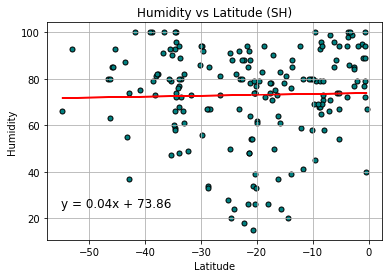

In [23]:
# Plot Humidity vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Humidity"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,25),fontsize=12,color="black")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/sourthernhumvlat.png")

In [24]:
print("The low r values indicate a weak to no relationship between humidity and latitude.")

The low r values indicate a weak to no relationship between humidity and latitude.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

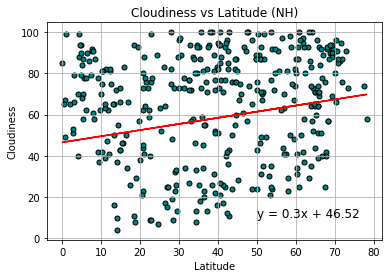

In [25]:
# Plot Cloudiness vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Cloudiness"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(50,10),fontsize=12,color="black")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/northerncloudvlat.png")

In [26]:
print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The low r values indicate a weak positive relationship between latitude and cloudiness.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

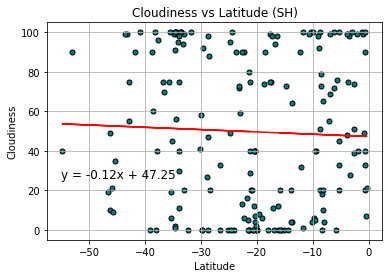

In [27]:
# Plot Cloudiness vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Cloudiness"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Cloudiness"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,26),fontsize=12,color="black")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig('../images/southerncloudvlat')

In [28]:
print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The low r values indicate a weak positive relationship between latitude and cloudiness.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

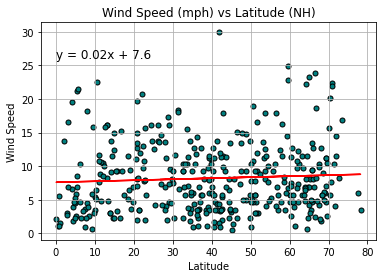

In [29]:
# Plot Wind Speed (mph) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Wind Speed"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(0,26),fontsize=12,color="black")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig('../images/northernwindvlat')

In [30]:
print("The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")

The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

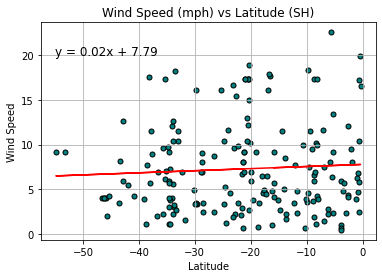

In [31]:
# Plot Wind Speed (mph) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Wind Speed"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,20),fontsize=12,color="black")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig('../images/southernwindvlat')

In [32]:
print("The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")

The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.
